# Title

Here's a [question from the Reddit statistics forum](https://www.reddit.com/r/AskStatistics/comments/1czl93x/percentage_significance_formula/).

> I can't remember which formula to use. I'm not doing this for homework, I'm just a researcher with brain fog.
>
> I'm comparing percentages and I can't remember which formula to use. Google was inconsistent.

> I am comparing percentages. ie one group of people got answers right 50% of the time and this other group got answers 40% of the time. I'm trying to find the best way to crunch the numbers to see if it's significant or nah.


Intro

Update the link...

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/DataQnA/blob/main/nb/XXX.ipynb).

I'll download a utilities module with some of my frequently-used functions, and then import the usual libraries.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/DataQnA/raw/main/nb/utils.py')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import decorate

In [2]:
# install the empiricaldist library, if necessary

try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

## Answer

In [3]:
n = 100
k1 = 40
k2 = 50

In [7]:
def percent_diff(k1, k2, n):
    p1 = k1 / n * 100
    p2 = k2 / n * 100
    return p2 - p1

In [17]:
actual_diff = percent_diff(k1, k2, n)
actual_diff

10.0

In [10]:
p = (k1 + k2) / (n + n)
p

0.45

In [13]:
from scipy.stats import binom

def simulate_percent_diff(n, p):
    k1 = binom.rvs(n, p)
    k2 = binom.rvs(n, p)
    return percent_diff(k1, k2, n)

In [14]:
simulate_percent_diff(n, p)

3.0

In [15]:
sample = [simulate_percent_diff(n, p) for i in range(1001)]

<Axes: ylabel='Density'>

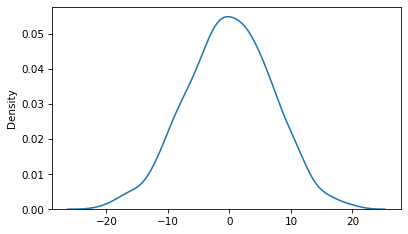

In [18]:
sns.kdeplot(sample)

In [20]:
p_value = np.mean(np.abs(sample) > actual_diff)
p_value

0.13486513486513488

In [31]:
ks1 = binom.rvs(n, p, size=1000001)
ks2 = binom.rvs(n, p, size=1000001)
sample = percent_diff(ks1, ks2, n)
np.mean(np.abs(sample) > actual_diff)

0.1385968614031386

In [32]:
import statsmodels.api as sm

ks = [40, 50]
ns = [100, 100]

stat, pval = sm.stats.proportions_ztest(ks, ns)
pval

0.1552184896846841

## Discussion

[*Data Q&A: Answering the real questions with Python*](https://allendowney.github.io/DataQnA/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)